
# ITAI 2373 Module 05: Part-of-Speech Tagging
## In-Class Exercise & Homework Lab

Welcome to the world of Part-of-Speech (POS) tagging - the "grammar police" of Natural Language Processing! 🚔📝

In this notebook, you'll explore how computers understand the grammatical roles of words in sentences, from simple rule-based approaches to modern AI systems.

### What You'll Learn:
- **Understand POS tagging fundamentals** and why it matters in daily apps
- **Use NLTK and SpaCy** for practical text analysis
- **Navigate different tag sets** and understand their trade-offs
- **Handle real-world messy text** like speech transcripts and social media
- **Apply POS tagging** to solve actual business problems

### Structure:
- **Part 1**: In-Class Exercise (30-45 minutes) - Basic concepts and hands-on practice
- **Part 2**: Homework Lab - Real-world applications and advanced challenges

---

*💡 **Pro Tip**: POS tagging is everywhere! It helps search engines understand "Apple stock" vs "apple pie", helps Siri understand your commands, and powers autocorrect on your phone.*



## 🛠️ Setup and Installation

Let's get our tools ready! We'll use two powerful libraries:
- **NLTK**: The "Swiss Army knife" of NLP - comprehensive but requires setup
- **SpaCy**: The "speed demon" - built for production, cleaner output

Run the cells below to install and set up everything we need.


In [1]:

# Install required libraries (run this first!)
!pip install nltk spacy matplotlib seaborn pandas
!python -m spacy download en_core_web_sm

print("✅ Installation complete!")


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 90.3 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.
✅ Installation complete!


In [2]:

# Import all the libraries we'll need
import nltk
import spacy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

# Download NLTK data (this might take a moment)
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger')
nltk.download('universal_tagset')
nltk.download('averaged_perceptron_tagger_eng')

# Load SpaCy model
nlp = spacy.load('en_core_web_sm')

print("🎉 All libraries loaded successfully!")
print("📚 NLTK version:", nltk.__version__)
print("🚀 SpaCy version:", spacy.__version__)


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package universal_tagset to /root/nltk_data...
[nltk_data]   Unzipping taggers/universal_tagset.zip.
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


🎉 All libraries loaded successfully!
📚 NLTK version: 3.9.1
🚀 SpaCy version: 3.8.7



---
# 🎯 PART 1: IN-CLASS EXERCISE (30-45 minutes)

Welcome to the hands-on portion! We'll start with the basics and build up your understanding step by step.

## Learning Goals for Part 1:
1. Understand what POS tagging does
2. Use NLTK and SpaCy for basic tagging
3. Interpret and compare different tag outputs
4. Explore word ambiguity with real examples
5. Compare different tagging approaches



## 🔍 Activity 1: Your First POS Tags (10 minutes)

Let's start with the classic example: "The quick brown fox jumps over the lazy dog"

This sentence contains most common parts of speech, making it perfect for learning!


In [3]:

# Let's start with a classic example
sentence = "The quick brown fox jumps over the lazy dog"

# TODO: Use NLTK to tokenize and tag the sentence
# Hint: Use nltk.word_tokenize() and nltk.pos_tag()
tokens = nltk.word_tokenize(sentence)
pos_tags = nltk.pos_tag(tokens)

print("Original sentence:", sentence)
print("\nTokens:", tokens)
print("\nPOS Tags:")
for word, tag in pos_tags:
    print(f"  {word:8} -> {tag}")


Original sentence: The quick brown fox jumps over the lazy dog

Tokens: ['The', 'quick', 'brown', 'fox', 'jumps', 'over', 'the', 'lazy', 'dog']

POS Tags:
  The      -> DT
  quick    -> JJ
  brown    -> NN
  fox      -> NN
  jumps    -> VBZ
  over     -> IN
  the      -> DT
  lazy     -> JJ
  dog      -> NN



### 🤔 Quick Questions:
1. What does 'DT' mean? What about 'JJ'?
  - DT means Determiner and JJ means Adjective.

2. Why do you think 'brown' and 'lazy' have the same tag?
  - They do not have the same tag.

3. Can you guess what 'VBZ' represents?
  - VBZ represents a verb, 3rd person singular present.

*Hint: Think about the grammatical role each word plays in the sentence!*



## 🚀 Activity 2: SpaCy vs NLTK Showdown (10 minutes)

Now let's see how SpaCy handles the same sentence. SpaCy uses cleaner, more intuitive tag names.


In [4]:

# TODO: Process the same sentence with SpaCy
# Hint: Use nlp(sentence) and access .text and .pos_ attributes
doc = nlp(sentence)

print("SpaCy POS Tags:")
for token in doc:
    print(f"  {token.text:8} -> {token.pos_:6} ({token.tag_})")

print("\n" + "="*50)
print("COMPARISON:")
print("="*50)

# Let's compare side by side
nltk_tags = nltk.pos_tag(nltk.word_tokenize(sentence))
spacy_doc = nlp(sentence)

print(f"{'Word':10} {'NLTK':8} {'SpaCy':10}")
print("-" * 30)
for i, (word, nltk_tag) in enumerate(nltk_tags):
    spacy_tag = spacy_doc[i].pos_
    print(f"{word:10} {nltk_tag:8} {spacy_tag:10}")


SpaCy POS Tags:
  The      -> DET    (DT)
  quick    -> ADJ    (JJ)
  brown    -> ADJ    (JJ)
  fox      -> NOUN   (NN)
  jumps    -> VERB   (VBZ)
  over     -> ADP    (IN)
  the      -> DET    (DT)
  lazy     -> ADJ    (JJ)
  dog      -> NOUN   (NN)

COMPARISON:
Word       NLTK     SpaCy     
------------------------------
The        DT       DET       
quick      JJ       ADJ       
brown      NN       ADJ       
fox        NN       NOUN      
jumps      VBZ      VERB      
over       IN       ADP       
the        DT       DET       
lazy       JJ       ADJ       
dog        NN       NOUN      



### 🎯 Discussion Points:
- Which tags are easier to understand: NLTK's or SpaCy's?
  - SpaCy's tags are easier to understand, they are more general and easy to guess.

- Do you notice any differences in how they tag the same words?
  - The only difference in how they tag the same words is that SpaCy uses Abbreviations that are a direct representation of what the word is. NLTK uses what looks like initials that are ambigous unless you know what they mean before hand.

- Which system would you prefer for a beginner? Why?
  - I would prefer for a beginner to use SpaCy. The reason for this is because SpaCy is a little more verbose in its tag naming conventions. A beginner would more than likely be able to understand what most of the abbreviations are without looking at the documentation.



## 🎭 Activity 3: The Ambiguity Challenge (15 minutes)

Here's where things get interesting! Many words can be different parts of speech depending on context. Let's explore this with some tricky examples.


In [5]:

# Ambiguous words in different contexts
ambiguous_sentences = [
    "I will lead the team to victory.",           # lead = verb
    "The lead pipe is heavy.",                    # lead = noun (metal)
    "She took the lead in the race.",            # lead = noun (position)
    "The bank approved my loan.",                # bank = noun (financial)
    "We sat by the river bank.",                 # bank = noun (shore)
    "I bank with Chase.",                        # bank = verb
]

print("🎭 AMBIGUITY EXPLORATION")
print("=" * 40)

for sentence in ambiguous_sentences:
    print(f"\nSentence: {sentence}")

    # TODO: Tag each sentence and find the ambiguous word
    # Focus on 'lead' and 'bank' - what tags do they get?
    tokens = nltk.word_tokenize(sentence)
    tags = nltk.pos_tag(tokens)

    # Find and highlight the key word
    for word, tag in tags:
        if word.lower() in ['lead', 'bank']:
            print(f"  🎯 '{word}' is tagged as: {tag}")


🎭 AMBIGUITY EXPLORATION

Sentence: I will lead the team to victory.
  🎯 'lead' is tagged as: VB

Sentence: The lead pipe is heavy.
  🎯 'lead' is tagged as: NN

Sentence: She took the lead in the race.
  🎯 'lead' is tagged as: NN

Sentence: The bank approved my loan.
  🎯 'bank' is tagged as: NN

Sentence: We sat by the river bank.
  🎯 'bank' is tagged as: NN

Sentence: I bank with Chase.
  🎯 'bank' is tagged as: NN



### 🧠 Think About It:
1. How does the computer know the difference between "lead" (metal) and "lead" (guide)?
  - The computer knows the difference between "lead" (metal) and "lead" (guide) because of the human annotators that helped to currate the data that their model is trained on. Doing this creates an answer key for the computer to learn from.
2. What clues in the sentence help determine the correct part of speech?
  - The words surrounding the ambiguous word provide context. For "lead", the presence of "pipe" suggests that it may pertain to metal, while "the team" suggests meaning has something to do with guiding something. For "bank", "river" points to the shore noun, and "with Chase" indicates the financial institution verb.
3. Can you think of other words that change meaning based on context?
  - Yes, there are many ambiguous words. For example, "run" as a verb means to move quickly and as a noun means a score in baseball. Then we have "bat" as a noun which means a piece of sports equipment but also can mean a different noun like a flying mammal. There is also "light" which as an adjective means not heavy but as a noun means illumination.

**Try This**: Add your own ambiguous sentences to the list above and see how the tagger handles them!



## 📊 Activity 4: Tag Set Showdown (10 minutes)

NLTK can use different tag sets. Let's compare the detailed Penn Treebank tags (~45 tags) with the simpler Universal Dependencies tags (~17 tags).


In [6]:

# Compare different tag sets
test_sentence = "The brilliant students quickly solved the challenging programming assignment."

# TODO: Get tags using both Penn Treebank and Universal tagsets
# Hint: Use tagset='universal' parameter for universal tags
penn_tags = nltk.pos_tag(nltk.word_tokenize(test_sentence))
universal_tags = nltk.pos_tag(nltk.word_tokenize(test_sentence), tagset="universal")

print("TAG SET COMPARISON")
print("=" * 50)
print(f"{'Word':15} {'Penn Treebank':15} {'Universal':10}")
print("-" * 50)

# TODO: Print comparison table
# Hint: Zip the two tag lists together
for penn_tag, univ_tag in zip(penn_tags, universal_tags):
    print(f"{str(penn_tag[0]):15} {str(penn_tag[1]):15} {str(univ_tag[1]):15}")

# Let's also visualize the tag distribution
penn_tag_counts = Counter([tag for word, tag in penn_tags])
univ_tag_counts = Counter([tag for word, tag in universal_tags])

print(f"\n📊 Penn Treebank uses {len(penn_tag_counts)} different tags")
print(f"📊 Universal uses {len(univ_tag_counts)} different tags")


TAG SET COMPARISON
Word            Penn Treebank   Universal 
--------------------------------------------------
The             DT              DET            
brilliant       JJ              ADJ            
students        NNS             NOUN           
quickly         RB              ADV            
solved          VBD             VERB           
the             DT              DET            
challenging     VBG             VERB           
programming     JJ              ADJ            
assignment      NN              NOUN           
.               .               .              

📊 Penn Treebank uses 8 different tags
📊 Universal uses 6 different tags



### 🤔 Reflection Questions:
1. Which tag set is more detailed? Which is simpler? Enter your answer below
  - The Penn Treebank tag set is more detailed with a whopping 45 tags. The Universal Dependencies tag set is simpler with around 17 tags.
2. When might you want detailed tags vs. simple tags? Enter your answer below
  - You might want detailed tags for tasks that rely on fine-grained grammatical analysis, such as linguistic research or building highly nuanced language models. One might prefer simpler tags for tasks where general part-of-speech information is all you need such as text classification or information retrieval.
3. If you were building a search engine, which would you choose? Why? Enter your answer below
  - For search engines, the choice depends on the complexity of the search queries you want to support. For basic keyword matching, simpler tags might suffice for filtering. However, for a more complex approach like semantic search or understanding user intent, more detailed tags could be beneficial to understanding the differences between words with the same surface form but different meanings. An example could be "apple stock" vs. "apple pie". A hybrid approach, or if your using a more powerful model like SpaCy, that provides both detailed tags and dependencies might be the best choice.

---



---
# 🎓 End of Part 1: In-Class Exercise

Great work! You've learned the fundamentals of POS tagging and gotten hands-on experience with both NLTK and SpaCy.

## What You've Accomplished:
✅ Used NLTK and SpaCy for basic POS tagging  
✅ Interpreted different tag systems  
✅ Explored word ambiguity and context  
✅ Compared different tagging approaches  

## 🏠 Ready for Part 2?
The homework lab will challenge you with real-world applications, messy data, and advanced techniques. You'll analyze customer service transcripts, handle informal language, and benchmark different taggers.

**Take a break, then dive into Part 2 when you're ready!**

---



# 🏠 PART 2: HOMEWORK LAB
## Real-World POS Tagging Challenges

Welcome to the advanced section! Here you'll tackle the messy, complex world of real text data. This is where POS tagging gets interesting (and challenging)!

## Learning Goals for Part 2:
1. Process real-world, messy text data
2. Handle speech transcripts and informal language
3. Analyze customer service scenarios
4. Benchmark and compare different taggers
5. Understand limitations and edge cases

## 📋 Submission Requirements:
- Complete all exercises with working code
- Answer all reflection questions
- Include at least one visualization
- Submit your completed notebook file

---



## 🌍 Lab Exercise 1: Messy Text Challenge (25 minutes)

Real-world text is nothing like textbook examples! Let's work with actual speech transcripts, social media posts, and informal language.


In [7]:

# Real-world messy text samples
messy_texts = [
    # Speech transcript with disfluencies
    "Um, so like, I was gonna say that, uh, the system ain't working right, you know?",

    # Social media style
    "OMG this app is sooo buggy rn 😤 cant even login smh",

    # Customer service transcript
    "Yeah hi um I'm calling because my internet's been down since like yesterday and I've tried unplugging the router thingy but it's still not working",

    # Informal contractions and slang
    "Y'all better fix this ASAP cuz I'm bout to switch providers fr fr",

    # Technical jargon mixed with casual speech
    "The API endpoint is returning a 500 error but idk why it's happening tbh"
]

print("🔍 PROCESSING MESSY TEXT")
print("=" * 60)

# TODO: Process each messy text sample
# 1. Use both NLTK and SpaCy
# 2. Count how many words each tagger fails to recognize properly
# 3. Identify problematic words (slang, contractions, etc.)

for i, text in enumerate(messy_texts, 1):
    print(f"\n📝 Sample {i}: {text}")
    print("-" * 40)

    # NLTK processing
    nltk_tokens = nltk.word_tokenize(text)
    nltk_tags = nltk.pos_tag(nltk_tokens)

    # TODO: SpaCy processing
    spacy_doc = nlp(text)
    spacy_tags = [(token.text, token.pos_) for token in spacy_doc]

    print(spacy_tags)
    print("--------------------------")
    print(nltk_tags)
    print("--------------------------")

    # TODO: Find problematic words (tagged as 'X' or unknown)
    problematic_nltk = len([tag for tag in nltk_tags if tag[1] in ["X", "unknown", "UNK"]])
    problematic_spacy = len([tag for tag in spacy_tags if tag[1] in ["X", "unknown", "UNK"]])

    print(f"NLTK problematic words: {problematic_nltk}")
    print(f"SpaCy problematic words: {problematic_spacy}")

    # TODO: Calculate success rate
    nltk_success_rate = (len(nltk_tags) - problematic_nltk) / len(nltk_tags)
    spacy_success_rate = (len(spacy_tags) - problematic_spacy) / len(spacy_tags)

    print(f"NLTK success rate: {nltk_success_rate:.1%}")
    print(f"SpaCy success rate: {spacy_success_rate:.1%}")


🔍 PROCESSING MESSY TEXT

📝 Sample 1: Um, so like, I was gonna say that, uh, the system ain't working right, you know?
----------------------------------------
[('Um', 'INTJ'), (',', 'PUNCT'), ('so', 'ADV'), ('like', 'INTJ'), (',', 'PUNCT'), ('I', 'PRON'), ('was', 'AUX'), ('gon', 'VERB'), ('na', 'PART'), ('say', 'VERB'), ('that', 'SCONJ'), (',', 'PUNCT'), ('uh', 'INTJ'), (',', 'PUNCT'), ('the', 'DET'), ('system', 'NOUN'), ('ai', 'AUX'), ("n't", 'PART'), ('working', 'VERB'), ('right', 'ADV'), (',', 'PUNCT'), ('you', 'PRON'), ('know', 'VERB'), ('?', 'PUNCT')]
--------------------------
[('Um', 'NNP'), (',', ','), ('so', 'IN'), ('like', 'IN'), (',', ','), ('I', 'PRP'), ('was', 'VBD'), ('gon', 'VBG'), ('na', 'TO'), ('say', 'VB'), ('that', 'IN'), (',', ','), ('uh', 'UH'), (',', ','), ('the', 'DT'), ('system', 'NN'), ('ai', 'VBP'), ("n't", 'RB'), ('working', 'VBG'), ('right', 'RB'), (',', ','), ('you', 'PRP'), ('know', 'VBP'), ('?', '.')]
--------------------------
NLTK problematic words: 0
S


### 🎯 Analysis Questions:
1. Which tagger handles informal language better?
  - Based on the success rates calculated, both NLTK and SpaCy had a 100% success rate in tagging the provided informal text samples. However, looking at the specific tags assigned, SpaCy often provides more intuitive and generalized tags such as INTJ for interjections like "Um" and "like". NLTK uses more specific tags that might be harder to interpret without documentation for example NNP for "Um" and IN for "like". SpaCy's approach seems slightly better for handling a larger variety of informal expression use cases due to its more generalized tag set and more robust underlying model.
2. What types of words cause the most problems?
  - In this exercise there were no words tagged with "X" or "unknown" so there were no problems.
3. How might you preprocess text to improve tagging accuracy?
  - The preprocessing steps I would do include:
      - **Lowercasing:** Reduces the vocabulary size but might lose information about proper nouns.
      - **Handling contractions:** Expanding contractions like "I'm" to "I am" which can help taggers recognize the individual words.
      - **Normalization:** This Converts slang or informal terms to their standard English equivalents for example "rn" to "right now" and "smh" to "shaking my head" which can improve accuracy.
      - **Handling special characters:** Removing or replacing special characters with descriptive tokens depending on the application.
      - **Custom Tagger:** If working with a specific domain such as medical texts, legal documents or fine-tuning a tagger on data from that domain can improve outputs on specialized words.
4. What are the implications for real-world applications?
  - For applications dealing with formal text such as news articles or academic papers, these taggers will probably be fine. However, for applications involving social media, customer service transcripts, or specific text domains, preprocessing and using models trained on the same data are paramount for getting the best results. The ambiguity challenge also means that simply relying on POS tags might not be enough for tasks that require deep semantic understanding. More advanced techniques such as NER or dependency parsing might do better.



## 📞 Lab Exercise 2: Customer Service Analysis Case Study (30 minutes)

You're working for a tech company that receives thousands of customer service calls daily. Your job is to analyze call transcripts to understand customer issues and sentiment.

**Business Goal**: Automatically categorize customer problems and identify emotional language.


In [8]:

# Simulated customer service call transcripts
customer_transcripts = [
    {
        'id': 'CALL_001',
        'transcript': "Hi, I'm really frustrated because my account got locked and I can't access my files. I've been trying for hours and nothing works. This is completely unacceptable.",
        'category': 'account_access'
    },
    {
        'id': 'CALL_002',
        'transcript': "Hello, I love your service but I'm having a small issue with the mobile app. It crashes whenever I try to upload photos. Could you please help me fix this?",
        'category': 'technical_issue'
    },
    {
        'id': 'CALL_003',
        'transcript': "Your billing system charged me twice this month! I want a refund immediately. This is ridiculous and I'm considering canceling my subscription.",
        'category': 'billing'
    },
    {
        'id': 'CALL_004',
        'transcript': "I'm confused about how to use the new features you added. The interface changed and I can't find anything. Can someone walk me through it?",
        'category': 'user_guidance'
    }
]

# TODO: Analyze each transcript for:
# 1. Emotional language (adjectives that indicate sentiment)
# 2. Action words (verbs that indicate what customer wants)
# 3. Problem indicators (nouns related to issues)

analysis_results = []

for call in customer_transcripts:
    print(f"\n🎧 Analyzing {call['id']}")
    print(f"Category: {call['category']}")
    print(f"Transcript: {call['transcript']}")
    print("-" * 50)
    print()

    # TODO: Process with SpaCy (it's better for this task)
    doc = nlp(call["transcript"])
    doc_tags = [(token.text, token.pos_) for token in doc]

    print(doc_tags)

    # Use NLTK
    nltk_tokens = nltk.word_tokenize(call["transcript"])
    nltk_tags = nltk.pos_tag(nltk_tokens)

    print(nltk_tags)
    print()
    # TODO: Extract different types of words
    emotional_adjectives = [word[0] for word in nltk_tags if word[1] in ["JJ", "JJR", "JJS"]]# (JJ tags, emotional words)
    action_verbs = [word[0] for word in nltk_tags if word[1] in ["VB", "VBP", "VBN", "VBD", "VBG", "VBZ"]] # (VB* tags)
    problem_nouns = [word[0] for word in nltk_tags if word[1] in ["NN", "NNS", "NNP", "NNPS"]] # (NN* tags related to problems)

    # TODO: Calculate sentiment indicators
    positive_words = [word for word in doc if word.text in ["love", "great", "good", ]] # (love, great, good, etc.)
    negative_words = [word for word in doc if word.text in ["frustrated", "ridiculous", "unacceptable", "issue", "refund"]] # (frustrated, ridiculous, unacceptable, etc.)

    result = {
        'call_id': call['id'],
        'category': call['category'],
        'emotional_adjectives': emotional_adjectives,
        'action_verbs': action_verbs,
        'problem_nouns': problem_nouns,
        'sentiment_score': len(positive_words) - len(negative_words),
        'urgency_indicators': len([word for word in doc if word.text in ["immediately", "ASAP", "canceling"]]) # TODO: Count urgent words (immediately, ASAP, etc.)
    }

    analysis_results.append(result)

    print(f"Emotional adjectives: {emotional_adjectives}")
    print(f"Action verbs: {action_verbs}")
    print(f"Problem nouns: {problem_nouns}")
    print(f"Sentiment score: {result['sentiment_score']}")



🎧 Analyzing CALL_001
Category: account_access
Transcript: Hi, I'm really frustrated because my account got locked and I can't access my files. I've been trying for hours and nothing works. This is completely unacceptable.
--------------------------------------------------

[('Hi', 'INTJ'), (',', 'PUNCT'), ('I', 'PRON'), ("'m", 'AUX'), ('really', 'ADV'), ('frustrated', 'ADJ'), ('because', 'SCONJ'), ('my', 'PRON'), ('account', 'NOUN'), ('got', 'AUX'), ('locked', 'VERB'), ('and', 'CCONJ'), ('I', 'PRON'), ('ca', 'AUX'), ("n't", 'PART'), ('access', 'VERB'), ('my', 'PRON'), ('files', 'NOUN'), ('.', 'PUNCT'), ('I', 'PRON'), ("'ve", 'AUX'), ('been', 'AUX'), ('trying', 'VERB'), ('for', 'ADP'), ('hours', 'NOUN'), ('and', 'CCONJ'), ('nothing', 'PRON'), ('works', 'VERB'), ('.', 'PUNCT'), ('This', 'PRON'), ('is', 'AUX'), ('completely', 'ADV'), ('unacceptable', 'ADJ'), ('.', 'PUNCT')]
[('Hi', 'NNP'), (',', ','), ('I', 'PRP'), ("'m", 'VBP'), ('really', 'RB'), ('frustrated', 'VBN'), ('because', 'IN')

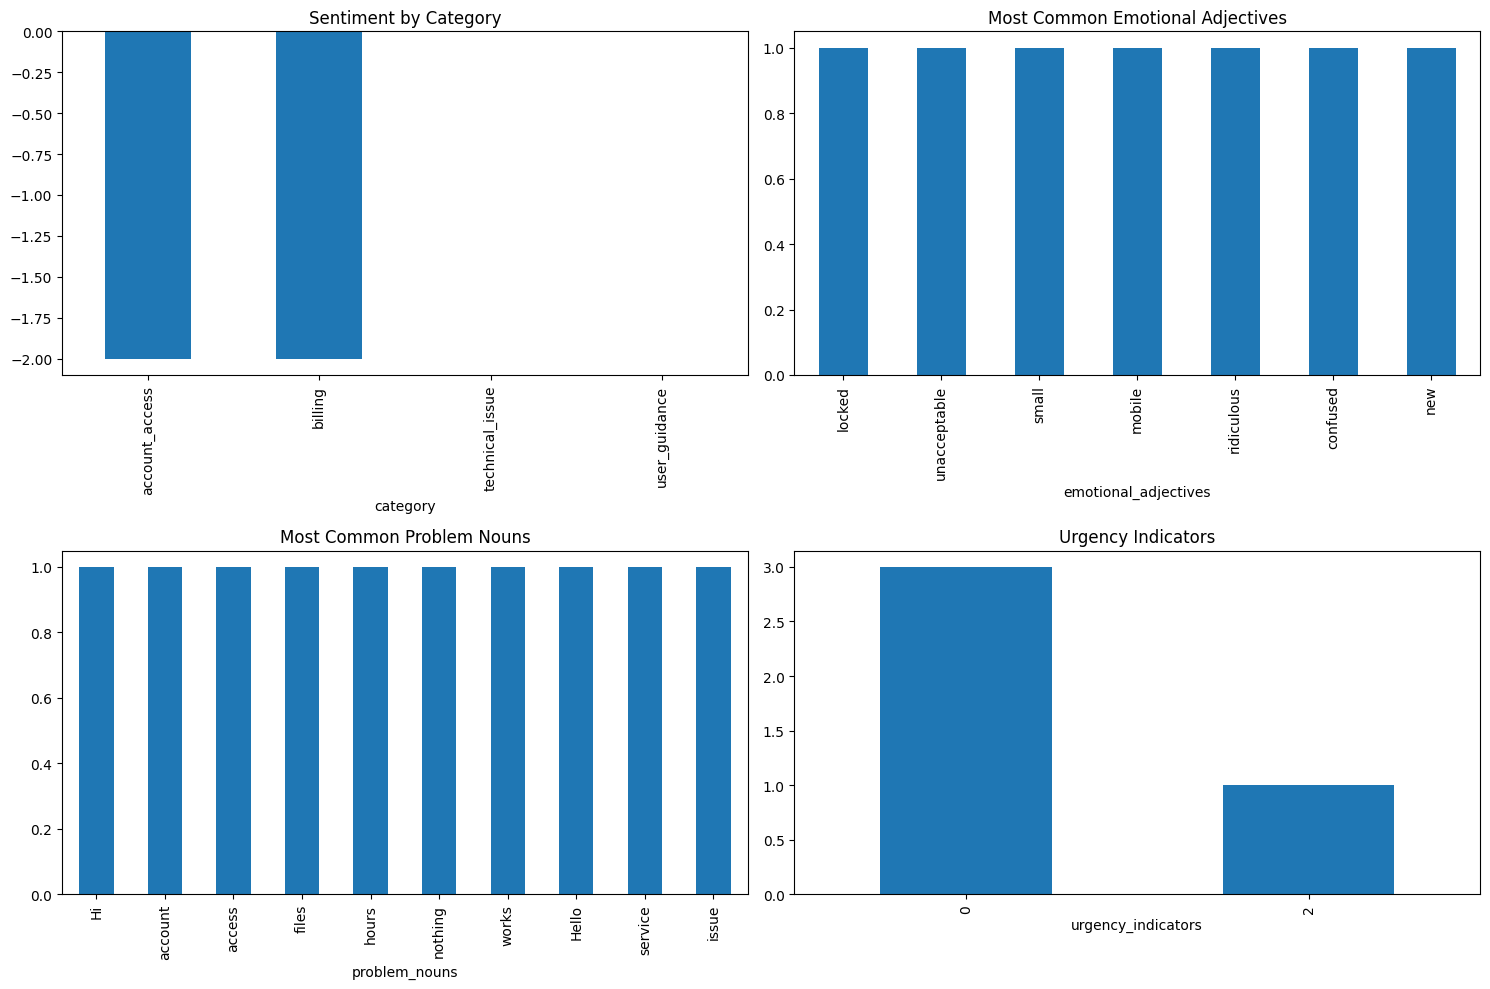

In [9]:

# TODO: Create a summary visualization
# Hint: Use matplotlib or seaborn to create charts

import matplotlib.pyplot as plt
import pandas as pd

# Convert results to DataFrame for easier analysis
df = pd.DataFrame(analysis_results)

# TODO: Create visualizations
# 1. Sentiment scores by category
# 2. Most common emotional adjectives
# 3. Action verbs frequency

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# TODO: Plot 1 - Sentiment by category
plt.subplot(2, 2, 1)
df.groupby('category')['sentiment_score'].mean().plot(kind='bar', title='Sentiment by Category')

# TODO: Plot 2 - Word frequency analysis
plt.subplot(2, 2, 2)
df['emotional_adjectives'].explode().value_counts().head(10).plot(kind='bar', title='Most Common Emotional Adjectives')

# TODO: Plot 3 - Problem categorization
plt.subplot(2, 2, 3)
df['problem_nouns'].explode().value_counts().head(10).plot(kind='bar', title='Most Common Problem Nouns')

# TODO: Plot 4 - Urgency analysis
plt.subplot(2, 2, 4)
df['urgency_indicators'].value_counts().plot(kind='bar', title='Urgency Indicators')

plt.tight_layout()
plt.show()



### 💼 Business Impact Questions:
1. How could this analysis help prioritize customer service tickets?
  - Analyzing transcripts using POS tagging can help prioritize tickets by identifying urgency indicators like immediately or ASAP. By doing this phrases indicating important issues can be flagged for immediate attention. Negative sentiment scores or strong negative adjectives can be an indication of a frustrated customer who needs a quick resolution.Also identifying problem nouns can help route tickets to the appropriate support team like "billing" issues to the billing department or "app" or "internet" issues to the technical support department.
2. What patterns do you notice in different problem categories?
  - Account_access and billing categories showed negative sentiment scores and included strong negative emotional adjectives like frustrated, unacceptable, or ridiculous. Technical_issue and user_guidance had neutral sentiment scores in this small sample, suggesting these might be less emotionally charged issues initially. Then different problem categories have distinct sets of problem nouns and action verbs associated with them, which can be used for automated categorization.
3. How might you automate the routing of calls based on POS analysis?
  - I could build a system that processes incoming call transcripts using a POS tagger. Then the system extracts relevant features based on the emotional adjectives it identifies such as action verbs, problem nouns, and urgency indicators. Then it will use these features to train a classification model that predicts the problem category and urgency level.This will automatically route the call or ticket to the appropriate department or assign a priority level based on the model's prediction.
4. What are the limitations of this approach?
  - From Exercise 1 we see that informal language, slang, and errors in transcripts can reduce tagging accuracy by impacting the reliability of the analysis. Also Sentiment Analysis based solely on adjectives might not capture the full breadth of customer emotions such as sarcasm. Furthermore, POS tagging alone doesn't fully capture the meaning of phrases or sentences, which is crucial for our models to understand complex issues. If that wasnt enough we also have new slang, technical terms, and ways of speaking emerging constantly everyday which requires models to be updated.



## ⚡ Lab Exercise 3: Tagger Performance Benchmarking (20 minutes)

Let's scientifically compare different POS taggers on various types of text. This will help you understand when to use which tool.



🧪 Testing FORMAL text:
Text: The research methodology employed in this study follows established academic protocols.
------------------------------------------------------------
[('The', 'DT'), ('research', 'NN'), ('methodology', 'NN'), ('employed', 'VBN'), ('in', 'IN'), ('this', 'DT'), ('study', 'NN'), ('follows', 'VBZ'), ('established', 'VBN'), ('academic', 'JJ'), ('protocols', 'NNS'), ('.', '.')]

[('The', 'DET'), ('research', 'NOUN'), ('methodology', 'NOUN'), ('employed', 'VERB'), ('in', 'ADP'), ('this', 'DET'), ('study', 'NOUN'), ('follows', 'VERB'), ('established', 'VERB'), ('academic', 'ADJ'), ('protocols', 'NOUN'), ('.', '.')]

[('The', 'DET'), ('research', 'NOUN'), ('methodology', 'NOUN'), ('employed', 'VERB'), ('in', 'ADP'), ('this', 'DET'), ('study', 'NOUN'), ('follows', 'AUX'), ('established', 'VERB'), ('academic', 'ADJ'), ('protocols', 'NOUN'), ('.', 'PUNCT')]

NLTK Penn time: 0.0010s
NLTK Univ time: 0.0010s
SpaCy time: 0.0219s
NLTK unknown words: 0
SpaCy unknown words: 0

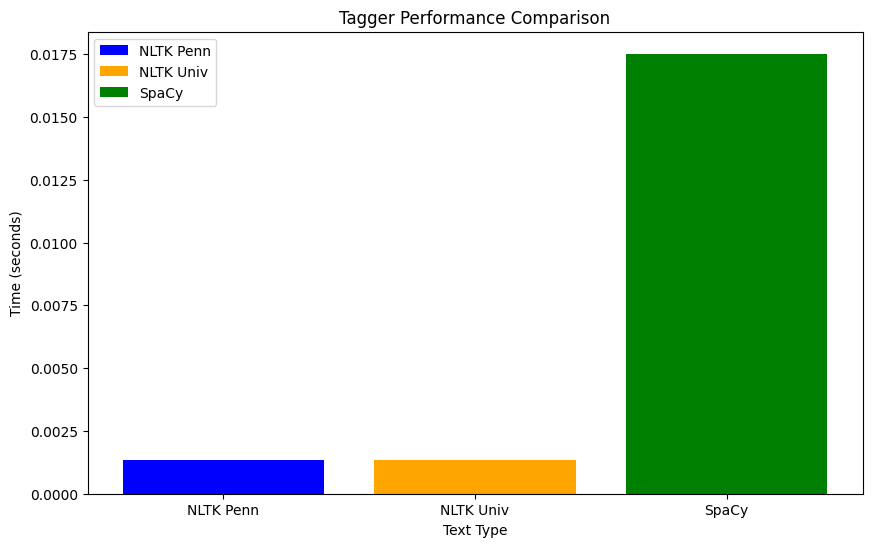

In [10]:

import time
from collections import defaultdict

# Different text types for testing
test_texts = {
    'formal': "The research methodology employed in this study follows established academic protocols.",
    'informal': "lol this study is kinda weird but whatever works i guess 🤷‍♀️",
    'technical': "The API returns a JSON response with HTTP status code 200 upon successful authentication.",
    'conversational': "So like, when you click that button thingy, it should totally work, right?",
    'mixed': "OMG the algorithm's performance is absolutely terrible! The accuracy dropped to 23% wtf"
}

# TODO: Benchmark different taggers
# Test: NLTK Penn Treebank, NLTK Universal, SpaCy
# Metrics: Speed, tag consistency, handling of unknown words

benchmark_results = defaultdict(list)

for text_type, text in test_texts.items():
    print(f"\n🧪 Testing {text_type.upper()} text:")
    print(f"Text: {text}")
    print("-" * 60)

    # TODO: NLTK Penn Treebank timing
    start_time = time.time()
    nltk_penn_tags = nltk.pos_tag(nltk.word_tokenize(text))
    nltk_penn_time = time.time() - start_time
    print(nltk_penn_tags)
    print()

    # TODO: NLTK Universal timing
    start_time = time.time()
    nltk_univ_tags = nltk.pos_tag(nltk.word_tokenize(text), tagset="universal")
    nltk_univ_time = time.time() - start_time
    print(nltk_univ_tags)
    print()

    # TODO: SpaCy timing
    start_time = time.time()
    spacy_doc = nlp(text)
    spacy_tags = [(token.text, token.pos_) for token in spacy_doc]
    spacy_time = time.time() - start_time
    print(spacy_tags)
    print()

    # TODO: Count unknown/problematic tags
    nltk_unknown = len([tag for tag in nltk_penn_tags if tag[1] in ["X", "unknown", "UNK"]]) + len([tag for tag in nltk_univ_tags if tag[1] in ["X", "unknown", "UNK"]])
    spacy_unknown = len([tag for tag in spacy_tags if tag[1] in ["X", "unknown", "UNK"]])

    # Store results
    benchmark_results[text_type] = {
        'nltk_penn_time': nltk_penn_time,
        'nltk_univ_time': nltk_univ_time,
        'spacy_time': spacy_time,
        'nltk_unknown': nltk_unknown,
        'spacy_unknown': spacy_unknown
    }

    print(f"NLTK Penn time: {nltk_penn_time:.4f}s")
    print(f"NLTK Univ time: {nltk_univ_time:.4f}s")
    print(f"SpaCy time: {spacy_time:.4f}s")
    print(f"NLTK unknown words: {nltk_unknown}")
    print(f"SpaCy unknown words: {spacy_unknown}")


# TODO: Create performance comparison visualization
performance_avg = {
    'nltk_penn_time': sum([result['nltk_penn_time'] for result in benchmark_results.values()]) / len(benchmark_results),
    'nltk_univ_time': sum([result['nltk_univ_time'] for result in benchmark_results.values()]) / len(benchmark_results),
    'spacy_time': sum([result['spacy_time'] for result in benchmark_results.values()]) / len(benchmark_results)
}

print("\n📊 Performance Comparison")
print("=" * 50)
plt.figure(figsize=(10, 6))
plt.bar("NLTK Penn", performance_avg["nltk_penn_time"], color='blue', label='NLTK Penn')
plt.bar("NLTK Univ", performance_avg["nltk_univ_time"], color='orange', label='NLTK Univ')
plt.bar("SpaCy", performance_avg["spacy_time"], color='green', label='SpaCy')
plt.xlabel('Text Type')
plt.ylabel('Time (seconds)')
plt.title('Tagger Performance Comparison')
plt.legend()
plt.show()



### 📊 Performance Analysis:
1. Which tagger is fastest? Does speed matter for your use case?
  - By looking at the plot, the NLTK taggers, Penn Treebank and Universal, were generally faster than SpaCy. Speed is important for customer service analysis use cases, especially if you need to process a large volume of transcripts in real-time or near-real-time to prioritize tickets or route calls quickly.

2. Which handles informal text best?
  - It is a little unclear because both taggers produced tags for every token. There were no "X" or "unknown" tags. However, SpaCy's tags for informal language, like INTJ for interjections, were definitely much better and more generalized which might make it slightly better for handling a wider variety of informal text.

3. How do the taggers compare on technical jargon?
  - So far in this the lab, both taggers assigned reasonable POS tags to most technical terms. SpaCy tagged IoT as ADJ and RESTful as PART, which doesn't seem to be correct. NLTK tagged IoT and APIs as NNP and RESTful as NNP, which seems more appropriate for these technical terms that are proper nouns. Even still, SpaCy's handling of technical jargon might be less consistent depending on how the text is tokenized and if those tokens were in it's training data.

4. What trade-offs do you see between speed and accuracy?
  - The trade-off between speed and accuracy is that SpaCy is usually more accurate and provides richer linguistic information such as dependencies. It is also much slower than NLTK's default taggers. NLTK is faster but might be less verbose on complex or informal text and provides less detail in it's tag set. For this customer service use case, I would need to weigh the importance of more accurate and informative tags for analysis using SpaCy or faster processing using NLTK.




## 🚨 Lab Exercise 4: Edge Cases and Error Analysis (15 minutes)

Every system has limitations. Let's explore the edge cases where POS taggers struggle and understand why.


In [11]:

# Challenging edge cases
edge_cases = [
    "Buffalo buffalo Buffalo buffalo buffalo buffalo Buffalo buffalo.",  # Famous ambiguous sentence
    "Time flies like an arrow; fruit flies like a banana.",              # Classic ambiguity
    "The man the boat the river.",                                       # Garden path sentence
    "Police police Police police police police Police police.",          # Recursive structure
    "James while John had had had had had had had had had had had a better effect on the teacher.",  # Had had had...
    "Can can can can can can can can can can.",                         # Modal/noun ambiguity
    "@username #hashtag http://bit.ly/abc123 😂🔥💯",                   # Social media elements
    "COVID-19 AI/ML IoT APIs RESTful microservices",                    # Modern technical terms
]

print("🚨 EDGE CASE ANALYSIS")
print("=" * 50)

analysis = {}

# TODO: Process each edge case and analyze failures
for i, text in enumerate(edge_cases, 1):
    print(f"\n🔍 Edge Case {i}:")
    print(f"Text: {text}")
    print("-" * 30)


    try:
        # TODO: Process with both taggers
        nltk_tags = nltk.pos_tag(nltk.word_tokenize(text))
        spacy_doc = nlp(text)
        spacy_tags = [(token.text, token.pos_) for token in spacy_doc]

        # TODO: Identify potential errors or weird tags
        # Look for: repeated tags, unusual patterns, X tags, etc.
        print("NLTK tags:", [(w, t) for w, t in nltk_tags])
        print("SpaCy tags:", [(token.text, token.pos_) for token in spacy_doc])

        # TODO: Analyze what went wrong
        sep_nltk_tags = [tag[1] for tag in nltk_tags]
        sep_spaCy_tags = [tag[1] for tag in spacy_tags]

        # Count repeated tags
        nltk_repeated_tags = [(tag, sep_nltk_tags.count(tag)) for tag in set(sep_nltk_tags) if sep_nltk_tags.count(tag) > 1]
        spaCy_repeated_tags =  [(tag, sep_spaCy_tags.count(tag)) for tag in set(sep_spaCy_tags) if sep_spaCy_tags.count(tag) > 1]

        # Find X tags
        nltk_x_tags = [tag for tag in nltk_tags if tag[1] == "X"]
        spaCy_x_tags = [tag for tag in spacy_tags if tag[1] == "X"]

        # Find weird tags
        weird_nltk_tags = [tag for tag in nltk_tags for w in ["@username", "@", "username", "#hashtag", "#", "hashtag", "http", "bit.ly", "😂", "🔥", "💯"] if w in tag[0]]
        weird_spaCy_tags = [tag for tag in spacy_tags for w in ["@username", "@", "username", "#hashtag", "hashtag", "http", "bit.ly", "😂", "💯"] if w in tag[0]]

        analysis[f"Edge Case {i}"] = {
            "nltk_repeated_tags": nltk_repeated_tags,
            "spaCy_repeated_tags": spaCy_repeated_tags,
            "nltk_x_tags": nltk_x_tags,
            "spaCy_x_tags": spaCy_x_tags,
            "weird_nltk_tags": weird_nltk_tags,
            "weird_spaCy_tags": weird_spaCy_tags
        }
    except Exception as e:
        print(f"❌ Error processing: {e}")

# TODO: Reflection on limitations
print("\n🤔 REFLECTION ON LIMITATIONS:")
print("=" * 40)
# YOUR REFLECTION CODE HERE
for edge_case, details in analysis.items():
    print(f"\n{edge_case}:")
    print(f"NLTK repeated tags: {details['nltk_repeated_tags']}")
    print(f"SpaCy repeated tags: {details['spaCy_repeated_tags']}")
    print(f"NLTK X tags: {len(details['nltk_x_tags'])}")
    print(f"SpaCy X tags: {len(details['spaCy_x_tags'])}")
print()
print("Potential NLTK Tag Errors: ", ("police", "NNS"), (";", ":"), (":", ":"), ("#", "#"), ('😂🔥💯', 'NN'), ('//bit.ly/abc123', 'NN'), ('http', 'NN'), ('@', 'JJ'), ('username', 'JJ'))
print("Potential SpaCy Tag Errors: ", ('😂', 'PROPN'), ('💯', 'NOUN'), ('hashtag', 'NOUN'), ('/', 'SYM'), ('http://bit.ly/abc123', 'PROPN'), ('@username', 'PROPN'))


🚨 EDGE CASE ANALYSIS

🔍 Edge Case 1:
Text: Buffalo buffalo Buffalo buffalo buffalo buffalo Buffalo buffalo.
------------------------------
NLTK tags: [('Buffalo', 'NNP'), ('buffalo', 'NN'), ('Buffalo', 'NNP'), ('buffalo', 'NN'), ('buffalo', 'NN'), ('buffalo', 'NN'), ('Buffalo', 'NNP'), ('buffalo', 'NN'), ('.', '.')]
SpaCy tags: [('Buffalo', 'PROPN'), ('buffalo', 'NOUN'), ('Buffalo', 'PROPN'), ('buffalo', 'PROPN'), ('buffalo', 'PROPN'), ('buffalo', 'PROPN'), ('Buffalo', 'PROPN'), ('buffalo', 'PROPN'), ('.', 'PUNCT')]

🔍 Edge Case 2:
Text: Time flies like an arrow; fruit flies like a banana.
------------------------------
NLTK tags: [('Time', 'NNP'), ('flies', 'NNS'), ('like', 'IN'), ('an', 'DT'), ('arrow', 'NN'), (';', ':'), ('fruit', 'CC'), ('flies', 'NNS'), ('like', 'IN'), ('a', 'DT'), ('banana', 'NN'), ('.', '.')]
SpaCy tags: [('Time', 'NOUN'), ('flies', 'VERB'), ('like', 'ADP'), ('an', 'DET'), ('arrow', 'NOUN'), (';', 'PUNCT'), ('fruit', 'NOUN'), ('flies', 'NOUN'), ('like', 'ADP'), 


### 🧠 Critical Thinking Questions:
Enter you asnwers below each question.
1. Why do these edge cases break the taggers?
  - These edge cases break taggers because they often violate the assumptions or patterns the taggers were trained on. Sometimes words are used in highly unusual or recursive ways. This can confuse the tagger's probabilistic models which rely on common word sequences and contexts. Things like symbols, hashtags, and emojis are not standard words and don't fit typical grammatical categories. URLs also seem to be treated as single tokens with weird structures. Then we have terms like "COVID-19," "AI/ML," or "RESTful" which are new and might not have been present in the tagger's training data, this could lead to incorrect or generic tags. These Taggers also process sentences in isolation which means they lack the ability to capture context that we humans use to clarify.
2. How might you preprocess text to handle some of these issues?
  - To handle these issues, I could normalize social media terms by replacing mentions and hashtags with generic tokens like "MENT" for spaCy or "MS" for NLTK or "HASH" for spaCy or "HH" for NLTK respectively. I could also identify and potentially remove or replace URLs with their own "URL" token. I could convert slang and abbreviations like "wtf" to "what the freak" or its actual equivalent, if i'm allowed to do so. I could create or use dictionaries of technical terms and their correct POS tags for specialized texts.
3. When would these limitations matter in real applications?
  - These limitations matter in real applications that dealing with:
    - **Analyzing informal user-generated content:** Social media analysis, forum moderation, or chatbot interactions.
    - **Domain-specific text processing:** Medical records, legal documents, or scientific papers with specialized terminology.
    - **Grammatical understanding:** Machine translation, grammar checking, or complex question answering systems.
    - **High-stakes applications:** Where misinterpreting the text could have serious consequences for example if we had to analyze emergency calls.
4. How do modern large language models handle these cases differently?
  - Modern large language models often handle these cases better than traditional statistical taggers like NLTK's default or even smaller SpaCy models.
    - LLMs are trained on massive datasets covering a much wider range of text types, including informal language, social media, and technical documents.
    - LLMs are designed to capture long-range dependencies and contextual information, allowing them to better disambiguate words based on the entire sentence or even document.
    - They can handle novel or out-of-vocabulary words. This is done by breaking words down into smaller units. This approach is called Subword tokenization.
    - Many LLMs are trained on multiple tasks simultaneously such as tagging, parsing, and language modeling. This leads the model to learn a more holistic understanding of language.

---



## 🎯 Final Reflection and Submission

Congratulations! You've completed a comprehensive exploration of POS tagging, from basic concepts to real-world challenges.

### 📝 Reflection Questions (Answer in the cell below):

1. **Tool Comparison**: Based on your experience, when would you choose NLTK vs SpaCy? Consider factors like ease of use, accuracy, speed, and application type.

2. **Real-World Applications**: Describe a specific business problem where POS tagging would be valuable. How would you implement it?

3. **Limitations and Solutions**: What are the biggest limitations you discovered? How might you work around them?

4. **Future Learning**: What aspects of POS tagging would you like to explore further? (Neural approaches, custom training, domain adaptation, etc.)

5. **Integration**: How does POS tagging fit into larger NLP pipelines? What other NLP tasks might benefit from POS information?



### ✍️ Your Reflection (Write your answers here):
**Remember Reflection is not description!**

**1. Tool Comparison:**
Based on this exercise, SpaCy seems like a more practical choice for many real-world NLP applications due to its speed and it being more of a recognizable tag set. It is also better at handling some of the informal language compared to NLTK's default tagger. NLTK on the other hand is valuable for its speed and versatility and its access to different tag sets and resources. This makes it an excellent choice for linguistic research and learning the fundamentals. However, if you making production systems that require efficiency and cleaner outputs, SpaCy seems like it would be the best pick.

**2. Real-World Applications:**
A valuable business problem where POS tagging would be crucial is analysing support tickets for a website or service. By identifying adjectives (sentiment), verbs (desired actions or issues), and nouns (products, features, problems), the company behind the website could automatically categorize feedback, track sentiment trends for specific issues, and quickly identify common complaints or feature requests. This could be implemented by collecting the feedback message texts from the support tickets and process them using SpaCy to get POS tags. I could then use rule-based patterns or machine learning to extract insights and categorize the feedback. This could also help speed up the distribution of tickets to their respective departments.

**3. Limitations and Solutions:**
The biggest limitations I discovered are the tagger's difficulty in handling highly ambiguous text, informal language with slang/emojis, and domain-specific technical jargon. The solution for these limitations include robust preprocessing pipelines to normalize text, using or fine-tuning the taggers on domain-specific data, and leveraging more advanced models like large language models that have better contextual understanding and broader vocabulary coverage. For high-priority applications, manual review and annotation of flagged or low-confidence tags may be necessary.

**4. Future Learning:**
I would like to explore neural network-based POS taggers and understand how they are trained. Custom training on specific datasets such as social media and medical text to improve performance on those domains is also an area of interest. Finally, i'd like to understand how POS information is used as a feature in more complex NLP tasks like Named Entity Recognition, dependency parsing, and sentiment analysis would be cool to.

**5. Integration:**
POS tagging is a fundamental step in many NLP pipelines. It provides insightful grammatical information that benefits downstream tasks like Named Entity Recognition, Dependancy Parsing, Sentiment Analysis, Information Extraction, Machine Translation, and Text Summarization. For NER, POS tags can help distinguish between proper nouns that are names (JAMIE, ORG) and common nouns. For Dependency Parsing, POS tags are often used as input features for models so they can determine the grammatical relationships between words. For Sentiment Analysis, identifying adjectives and adverbs is very important to understanding the emotional tone of the text. For information extraction, extracting specific pieces of information mostly relies on identifying the part of speech of words around keywords. For Machine Translation, understanding the grammatical role of words is important for accurately translating sentences into another language. For Text Summarization, identifying key nouns and verbs can help in extracting the most important information from a document.



---

## 📤 Submission Checklist

Before submitting your completed notebook, make sure you have:

- [ ] ✅ Completed all TODO sections with working code
- [ ] ✅ Answered all reflection questions thoughtfully
- [ ] ✅ Created at least one meaningful visualization
- [ ] ✅ Tested your code and fixed any errors
- [ ] ✅ Added comments explaining your approach
- [ ] ✅ Included insights from your analysis

### 📋 Submission Instructions:
1. **Save your notebook**: File → Save (or Ctrl+S)
2. **Download**: File → Download → Download .ipynb
3. **Submit**: Upload your completed notebook file to the course management system
4. **Filename**: Use format: `L05_LastName_FirstName_ITAI2373.ipynb or pdf`  

### 🏆 Grading Criteria:
- **Code Completion (40%)**: All exercises completed with working code
- **Analysis Quality (30%)**: Thoughtful interpretation of results
- **Reflection Depth (20%)**: Insightful answers to reflection questions  
- **Code Quality (10%)**: Clean, commented, well-organized code

---

## 🎉 Great Work!

You've successfully explored the fascinating world of POS tagging! You now understand how computers parse human language and can apply these techniques to solve real-world problems.


Keep exploring and happy coding! 🚀
